## Library , mount 

In [ ]:
#데이터 처리 관련 라이브러리 .
import os
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

import tensorflow as tf
import pickle
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.model_selection import train_test_split

# 모델관련 라이브러리 . 
from tensorflow.keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Activation, Dropout
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import Model


from tensorflow.keras.optimizers import Adam


from tensorflow.keras import models
from tensorflow.keras.models import save_model
from tqdm.notebook import tqdm

In [ ]:
#gdrive mount . 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#구현하려는 모델에 맞는 target size 미리 지정한다. 
#zero-centering할때는 사용안함 

target_size = (224, 224)

## 데이터 불러오기 

### 일반 이미지 


In [ ]:
###랜드마크 적용 전 사진
# 성공한 사진들 가지고 오기 . 
suc_ = os.listdir("/content/drive/MyDrive/CV/Suc")

# 실패한 사진들 가지고 오기 
fail_ = os.listdir("/content/drive/MyDrive/CV/Fail")

In [ ]:
# 성공한 사진들 가지고 오기 .  ##랜드마크 적용
suc_ = os.listdir("/content/drive/MyDrive/Landmark/Suc")

# 실패한 사진들 가지고 오기 
fail_ = os.listdir("/content/drive/MyDrive/Landmark/Fail")

In [ ]:
# suc 총 개수 , # fail 총 개수 
len(suc_), len(fail_)

(908, 699)

In [ ]:
folder_path='/content/drive/MyDrive/CV'
label_names=os.listdir(folder_path)
label_names

['Suc', 'Fail', 'landmark']

#원래 VGG

In [ ]:
#랜드마크 적용 전 코드
target_size = (224,224)
temp_x = []
for i in tqdm(range(len(suc_))):
  path = "/content/drive/MyDrive/CV/Suc/" + suc_[i]

  img = load_img(path, color_mode="rgb", target_size=target_size)
  img = img_to_array(img)
  temp_x.append(img)

for j in tqdm(range(len(fail_))):
  path = "/content/drive/MyDrive/CV/Fail/" + fail_[j]

  img = load_img(path, color_mode="rgb", target_size=target_size)
  img = img_to_array(img)
  temp_x.append(img)

train_x = np.array(temp_x)


  0%|          | 0/910 [00:00<?, ?it/s]

  0%|          | 0/699 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
#랜드마크 적용후 코드 
temp_x = []
for i in tqdm(range(len(suc_))):
    path = "/content/drive/MyDrive/Landmark/Suc/" + suc_[i]

    img = load_img(path, color_mode="rgb", target_size=target_size)
    img = img_to_array(img)
    temp_x.append(img)

for j in tqdm(range(len(fail_))):
    path = "/content/drive/MyDrive/Landmark/Fail/" + fail_[j]

    img = load_img(path, color_mode="rgb", target_size=target_size)
    img = img_to_array(img)
    temp_x.append(img)

train_x = np.array(temp_x)



In [ ]:
#y label 추가해서 만들기. 
y = [] 
for _ in range(len(suc_)):
  y.append(1)
for _ in range(len(fail_)):
  y.append(0)

train_y = np.array(y)

In [ ]:
#모델의 모양 확인. 
train_x.shape, train_y.shape

In [ ]:
#데이터 split 나중에 추가 확인. 
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.2)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

#Zero-centering/resize[실험]

In [ ]:
# 카테고리별로 이미지파일 경로 리스트 사전 만들기
# keys : 카테고리명
# values : 리스트 of 이미지 경로들
dataset = {} # 카테고리명 : [이미지1경로, 이미지2경로, ...]

for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = [] # dataset = {'motorbike' : []}
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

{'Suc': ['/content/drive/MyDrive/CV/Suc/지예흐성공 (2).png',
  '/content/drive/MyDrive/CV/Suc/지예흐성공 (3).png',
  '/content/drive/MyDrive/CV/Suc/지예흐성공.png',
  '/content/drive/MyDrive/CV/Suc/마리오 가브라노비치 1.png',
  '/content/drive/MyDrive/CV/Suc/마리오 가브라노비치 2.png',
  '/content/drive/MyDrive/CV/Suc/마리오 가브라노비치.png',
  '/content/drive/MyDrive/CV/Suc/마리오 가브라노비치3.png',
  '/content/drive/MyDrive/CV/Suc/마리오 가브라노비치 4.png',
  '/content/drive/MyDrive/CV/Suc/마리오 가브라노비치 5.png',
  '/content/drive/MyDrive/CV/Suc/포그바.png',
  '/content/drive/MyDrive/CV/Suc/포그바 2.png',
  '/content/drive/MyDrive/CV/Suc/포그바 3 .png',
  '/content/drive/MyDrive/CV/Suc/포그바 4.png',
  '/content/drive/MyDrive/CV/Suc/포그바 5.png',
  '/content/drive/MyDrive/CV/Suc/포그바 6.png',
  '/content/drive/MyDrive/CV/Suc/파비안 세어.png',
  '/content/drive/MyDrive/CV/Suc/파비안 세어 2.png',
  '/content/drive/MyDrive/CV/Suc/파비안 세어 2 (1).png',
  '/content/dri

In [ ]:
label2index = {'Fail':0, 'Suc':1}
images, labels = [], []

In [ ]:
import cv2

def resize_img(img_path, img_size=224):    
    try:
        img = cv2.imread(img_path)
        if(img.shape[1] > img.shape[0]) : 
            ratio = img_size/img.shape[1]
        else :
            ratio = img_size/img.shape[0]
        img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)

        # 그림 주변에 검은색으로 칠하기
        w, h = img.shape[1], img.shape[0]

        dw = (img_size-w)/2 # img_size와 w의 차이
        dh = (img_size-h)/2 # img_size와 h의 차이

        M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
        img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환  
        return img_re
    except:
        print(f"Failed to read/resize image {img_path}.")
        return None


In [ ]:
# 이미지 리사이즈
# 1. 이미지 하나씩 읽어들여서
# 2. 리사이즈한다음
# 3. images, labels 생성
for label, img_paths in dataset.items():
    for img_path in img_paths:
        img_re = resize_img(img_path, img_size=224)
        images.append(img_re)
        labels.append(label2index[label])

Failed to read/resize image /content/drive/MyDrive/CV/Fail/20230327_061002.png.
Failed to read/resize image /content/drive/MyDrive/CV/landmark/Suc.


KeyError: ignored

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(img_re[333].astype('uint8'))
plt.subplot(1,2,2)
plt.imshow(img_re[333].astype('uint8'))
plt.show

In [ ]:
# 리스트인 images, labels ndarray로 변환
images, labels = np.array(images), np.array(labels)

In [ ]:
cv2.imread

In [ ]:
images.shape, labels.shape

((1609, 224, 224, 3), (1609,))

In [ ]:
# images, labels -> x_train, y_train, x_test, y_test로 split

x_train, x_test, y_train, y_test = train_test_split(images, labels)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1206, 224, 224, 3), (403, 224, 224, 3), (1206,), (403,))

In [ ]:
# zero-centering
compute_mean = lambda imgs : np.mean(imgs, axis=0)

In [ ]:
# trainset으로 mean_img 계산하고, 
# testset은 trainset mean img로 
mean_img = compute_mean(x_train)
mean_img.shape

(224, 224, 3)

In [ ]:
zero_mean_img = mean_img.astype('int8') # 메모리 문제로 int8로 변환(근사값으로 사용)

In [ ]:
x_train = x_train.astype('int8') 
x_test = x_test.astype('int8') 

x_train -= zero_mean_img
x_test -= zero_mean_img
x_train.shape, x_test.shape

((1206, 224, 224, 3), (403, 224, 224, 3))

In [ ]:
y_train.shape, y_test.shape

((1206,), (403,))

### 랜드마크 이미지 

## 모델 빌드

### 기존 모델 빌드하기

In [ ]:
#VGG-Face model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=( 224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_28 (ZeroPadd  (None, 226, 226, 3)      0         
 ing2D)                                                          
                                                                 
 conv2d_32 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_29 (ZeroPadd  (None, 226, 226, 64)     0         
 ing2D)                                                          
                                                                 
 conv2d_33 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                      

In [ ]:
#vgg_model weight 가져오기
model.load_weights('/content/drive/MyDrive/model_weigth/vgg_face_weights.h5')

In [ ]:
#새롭게 pre_train 모델을 전이 학습하기 위해 학습시키고 싶은 layer를 지정한다. 

for layer in model.layers[:-7]:
    layer.trainable = False


# 새로운 own model을 빌드한다. 현재 -4 이후의 결과 == Fully connect layer 만 을 새롭게 빌드. 
base_model_output = Sequential()
base_model_output = Convolution2D(2, (1, 1), name='predictions')(model.layers[-4].output)
base_model_output = Flatten()(base_model_output)
base_model_output = Activation('softmax')(base_model_output)
 
soccer_model = Model(inputs=model.input, outputs=base_model_output) # 새로운 soccer_model 만들기. 

In [ ]:
# 모델 컴파일 현재 성공 실패를 원핫 인코딩안하고 있으니까 sparse categorical로 진행. 
soccer_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
soccer_model.fit(x_train, y_train, epochs=30, validation_split=0.1, callbacks=[early])


Epoch 1/30
34/34 [==============================] - 43s 252ms/step - loss: 5.8715 - accuracy: 0.5235 - val_loss: 1.6978 - val_accuracy: 0.5868
Epoch 2/30
34/34 [==============================] - 8s 245ms/step - loss: 2.6797 - accuracy: 0.6304 - val_loss: 0.8667 - val_accuracy: 0.6694
Epoch 3/30
34/34 [==============================] - 9s 263ms/step - loss: 1.4985 - accuracy: 0.7668 - val_loss: 2.4818 - val_accuracy: 0.7025
Epoch 4/30
34/34 [==============================] - 8s 247ms/step - loss: 4.3942 - accuracy: 0.7853 - val_loss: 4.2697 - val_accuracy: 0.7603
Epoch 5/30
34/34 [==============================] - 8s 248ms/step - loss: 3.1874 - accuracy: 0.8286 - val_loss: 2.0592 - val_accuracy: 0.8512
Epoch 6/30
34/34 [==============================] - 9s 253ms/step - loss: 4.9866 - accuracy: 0.8442 - val_loss: 2.7391 - val_accuracy: 0.8512


In [ ]:
# save_model(soccer_model_VGG, "/content/drive/MyDrive/model")
soccer_model.save('/content/drive/MyDrive/model')

#### 실제 예시하나 봐보기 

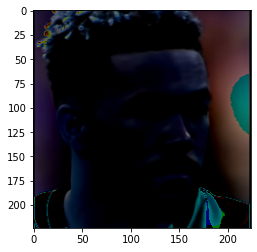

In [ ]:
plt.imshow(x_test[30])

In [ ]:
temp=x_test[100]

In [ ]:
img = cv2.imread('/content/20230324_225110.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)  # 4차원으로 reshape

In [ ]:
img_resized = cv2.resize(img, (224, 224))

In [ ]:
img.shape

(1, 224, 224, 3)

In [ ]:
soccer_model.evaluate(x_train,y_train)

38/38 [==============================] - 7s 182ms/step - loss: 0.4123 - accuracy: 0.9652


[0.4123184084892273, 0.96517413854599]

In [ ]:
soccer_model.evaluate(x_test,y_test)


13/13 [==============================] - 5s 362ms/step - loss: 3.3072 - accuracy: 0.8040


[3.3071558475494385, 0.803970217704773]

In [ ]:
soccer_model.predict(img)


1/1 [==============================] - 0s 178ms/step


array([[9.088815e-34, 1.000000e+00]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

y_pred = soccer_model.predict(x_test) #모델만 변경

y_preds = []
for i in y_pred:
    y_preds.append(np.argmax(i))

name = ['0', '1']

print(classification_report(y_test, y_preds, target_names=name))

<function matplotlib.pyplot.show(close=None, block=None)>

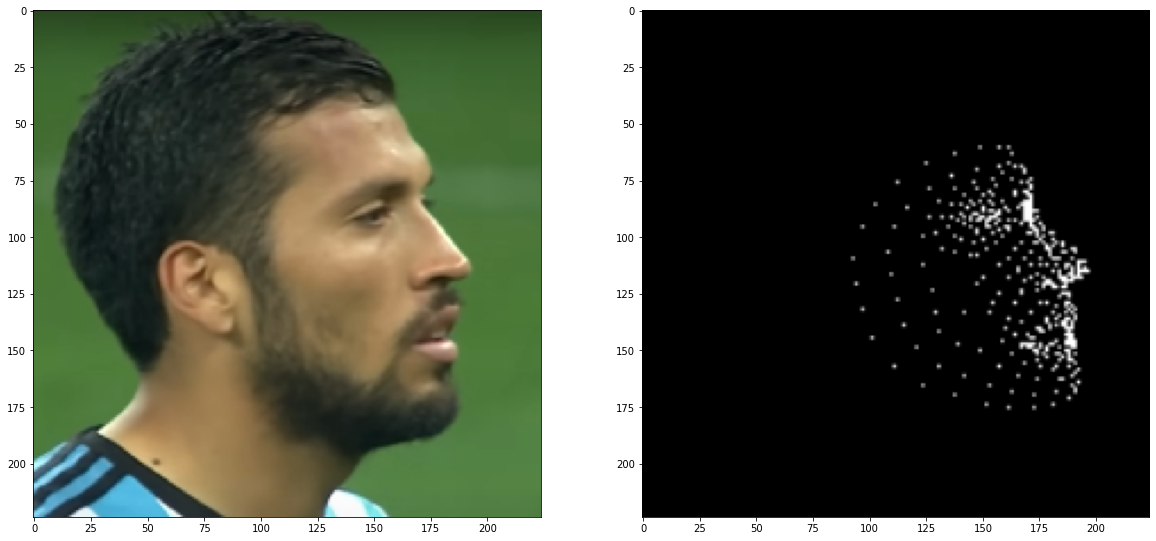

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.imshow(df['img'][235].astype('uint8'))
plt.subplot(1,2,2)
plt.imshow(df['arr'][235].astype('uint8'))
plt.show

In [ ]:
# temp_x = []
# for i in tqdm(range(len(df['img']))):
#     try:
#         t1 = np.concatenate((df['img'][i] ,df['arr'][i]), axis = -1)
#         temp_x.append(t1)
#     except:
#         tmp = df['arr'][i]
#         tmp = np.stack((tmp,)*3, axis=-1)
#         t1 = np.concatenate((df['img'][i] ,tmp), axis = -1)
#         temp_x.append(t1)
# train_x_land_img = np.array(temp_x)
# train_x_land_img.shape

  0%|          | 0/1609 [00:00<?, ?it/s]

(1609, 224, 224, 6)